<a href="https://colab.research.google.com/github/pastoril10/QualidadeDaAgua/blob/main/Classifica%C3%A7%C3%A3oDaQualidadeDaagua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dicionario

*   ph: pH da água (0 a 14).
*   Hardness: Capacidade da água para precipitar o sabão em mg / L.

*   Solids: Total de sólidos dissolvidos em ppm.

*   Chloramines: Quantidade de cloraminas em ppm.

*   Sulfate: Quantidade de sulfatos dissolvidos em mg / L.
*   Conductivity: Condutividade elétrica da água em μS / cm.


*   Organic_carbon: Quantidade de carbono orgânico em ppm.

*   Trihalomethanes: Quantidade de trihalometanos em μg / L.


*   Turbidity: Medida da propriedade de emissão de luz da água em NTU.

*   Potability: Indica se a água é segura para consumo humano. Potável - 1 e Não potável -0



### Unidades de medida

ppm: parts per million

μg/L: microgram per litre

mg/L: milligram per litre

In [132]:
import pandas as pd
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [133]:
df = pd.read_csv("water_potability.csv")

In [134]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Existe dados faltantes? Sim!!

In [135]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

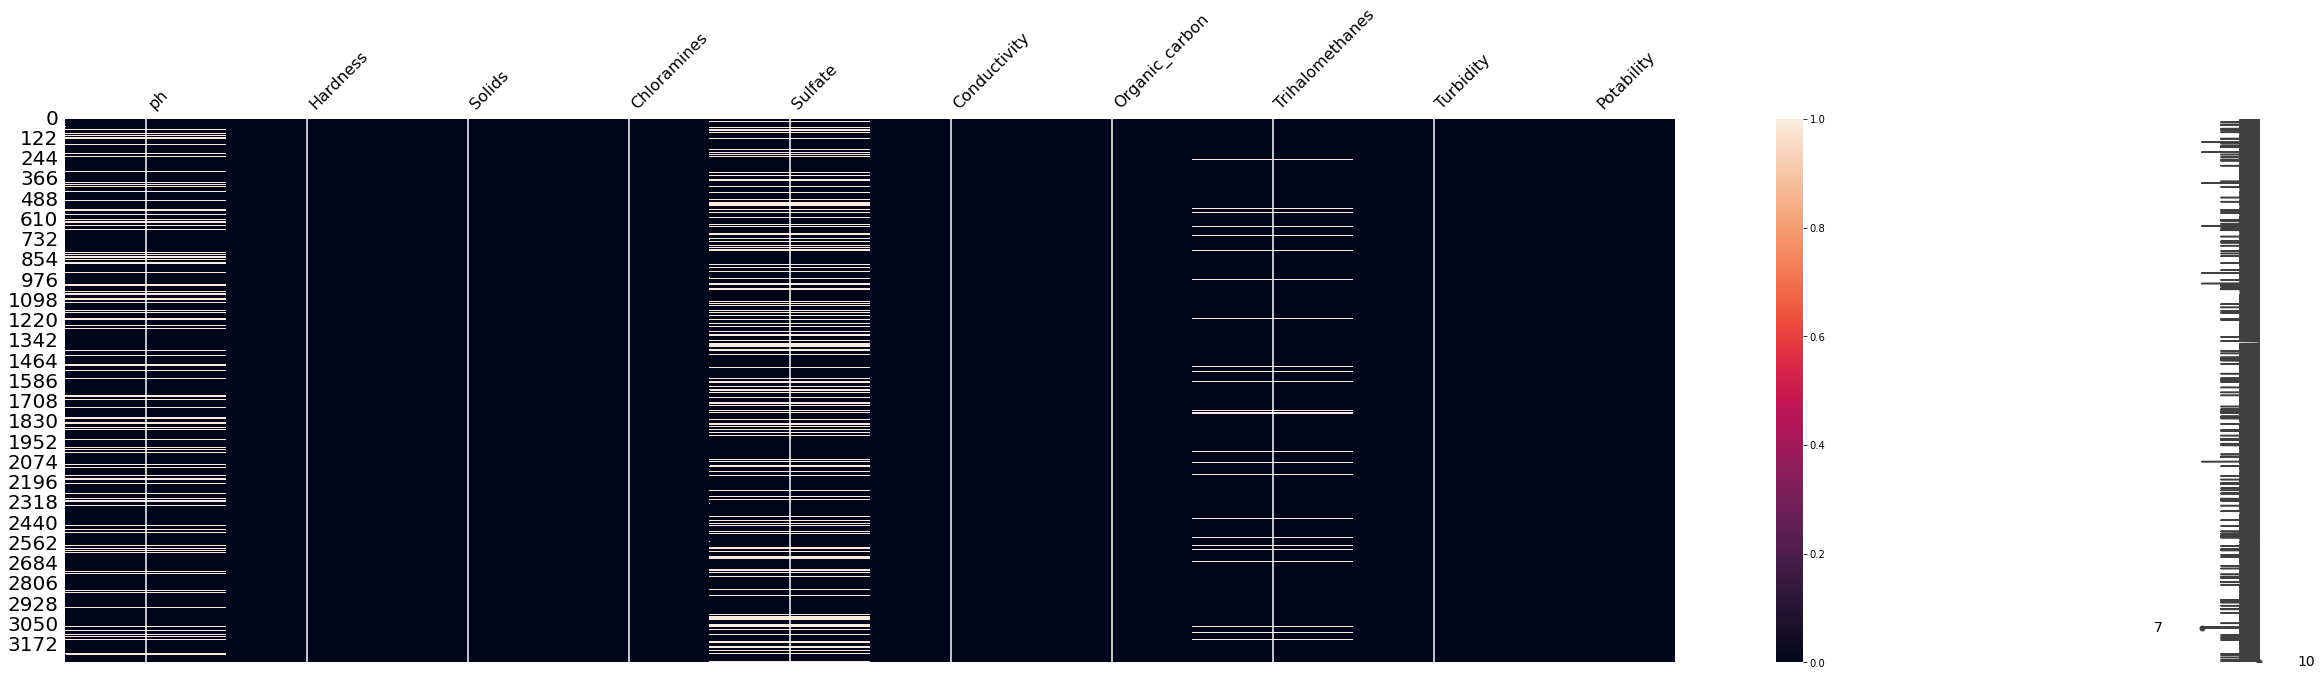

In [136]:
#Visualizando dados faltantes na forma de um mapa.
missingno.matrix(df, figsize=(40,10))
sns.heatmap(df.isnull())

In [137]:
df.shape

(3276, 10)

### Potability: 
Indica se a água é segura para consumo humano. 

Potável - 1 

Não potável - 0

In [138]:
df.Potability.dtype

dtype('int64')

In [139]:
df.Potability.unique()

array([0, 1])

In [140]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [141]:
df.rename(columns={"Potability":"potabilidade"}, inplace=True)

A porcentagem de agua potavel é de: 39.01%


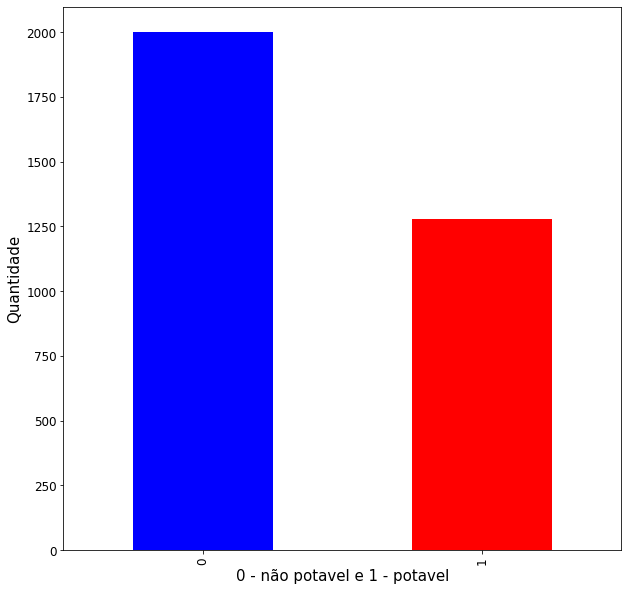

In [142]:
df.potabilidade.value_counts().plot(kind="bar", color=["blue", "red"], fontsize=12 , figsize=(10,10))
plt.xlabel("0 - não potavel e 1 - potavel", fontsize=15)
plt.ylabel('Quantidade', fontsize=15)

porc = (len(df[df.potabilidade == 1]) / len(df.potabilidade)) * 100
        
print('A porcentagem de agua potavel é de: {:.2f}%'.format(porc))

plt.show()


### Separando os dados em agua potavel e agua não potavel


In [143]:
df_potavel = df[df["potabilidade"]==1]
df_naopotavel = df[df["potabilidade"]==0]

In [144]:
#Tamanho do df para agua potavel
df_potavel.shape

(1278, 10)

In [145]:
#Tamanho do df para agua não potavel
df_naopotavel.shape

(1998, 10)

In [146]:
#A quantidade de dados faltantes para o df contendo somente os dados para agua potavel
df_potavel.isnull().sum()

ph                 177
Hardness             0
Solids               0
Chloramines          0
Sulfate            293
Conductivity         0
Organic_carbon       0
Trihalomethanes     55
Turbidity            0
potabilidade         0
dtype: int64

In [147]:
#A quantidade de dados faltantes para o df contendo somente os dados para agua não potavel
df_naopotavel.isnull().sum()

ph                 314
Hardness             0
Solids               0
Chloramines          0
Sulfate            488
Conductivity         0
Organic_carbon       0
Trihalomethanes    107
Turbidity            0
potabilidade         0
dtype: int64

In [148]:
#Análise da média (das colunas faltantes) para os dados de agua potavel e não potavel. 
#Verificar se tem diferença consideravel entre os valores.
media = [df_naopotavel.mean(),df_potavel.mean()]
df_media = pd.DataFrame(media)
df_media.iloc[:,[0,4,7]]

,ph,Sulfate,Trihalomethanes
0,7.085378,334.56429,66.303555
1,7.073783,332.56699,66.539684


A diferença entre as médias é minima, sendo assim, podemos substituir os dados faltantes pela média. 

### pH: 
pH da água (0 a 14).

A OMS recomendou o limite máximo permitido de pH de 6,5 a 8,5. Os intervalos de investigação atuais foram de 6,52–6,83, que estão na faixa dos padrões da OMS.

In [149]:
df.ph.dtype

dtype('float64')

In [150]:
df.ph.min()

0.0

In [151]:
df.ph.max()

13.999999999999998

In [152]:
df.ph.mean()

7.080794504276821

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eac0a0cd0>]],
      dtype=object)

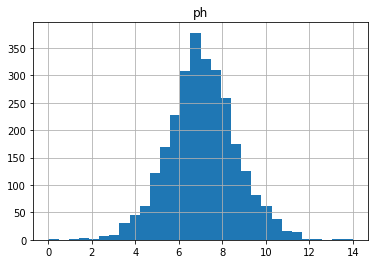

In [153]:
df.hist("ph", bins = 30)

In [154]:
#Preenchendo os dados faltantes na coluna ph pela média.
df.ph.fillna(df.ph.mean(), inplace=True)

### Hardness (Dureza)

Capacidade da água para precipitar o sabão em mg / L.

O tempo que a água está em contato com o material que produz dureza ajuda a determinar quanta dureza existe na água bruta. A dureza foi originalmente definida como a capacidade da água de precipitar o sabão causado pelo cálcio e magnésio.

In [155]:
df.rename(columns={"Hardness":"dureza"}, inplace=True)

In [156]:
df.dureza.dtype

dtype('float64')

In [157]:
df.dureza.min()

47.431999999999995

In [158]:
df.dureza.max()

323.124

In [159]:
df.dureza.mean()

196.36949601730177

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eabf83ed0>]],
      dtype=object)

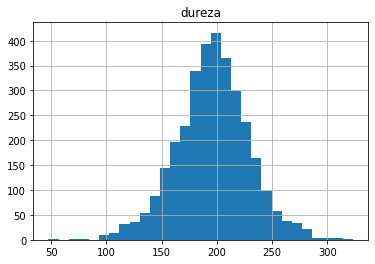

In [160]:
df.hist("dureza", bins = 30)

### Solids (Sólidos)

Total de sólidos dissolvidos - TDS

Este é o parâmetro importante para o uso da água. A água com alto valor de TDS indica que a água é altamente mineralizada. O limite desejável para o TDS é 500 mg /l e o limite máximo é 1000 mg /l, prescrito para beber.

In [161]:
df.rename(columns={"Solids":"solidos"}, inplace=True)

In [162]:
df.solidos.dtype

dtype('float64')

In [163]:
df.solidos.min()

320.942611274359

In [164]:
df.solidos.max()

61227.196007712126

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eabec5350>]],
      dtype=object)

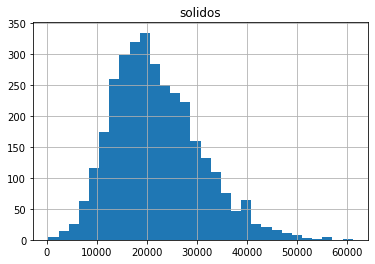

In [165]:
df.hist("solidos", bins = 30)

### Chloramines (Cloraminas)

Quantidade de cloraminas em ppm.

Os níveis de cloro de até 4 miligramas por litro (mg / L ou 4 partes por milhão (ppm)) são considerados seguros na água potável

In [166]:
df.rename(columns={"Chloramines":"cloramina"}, inplace = True)

In [167]:
df.cloramina.dtype

dtype('float64')

In [168]:
df.cloramina.min()

0.3520000000000003

In [169]:
df.cloramina.max()

13.127000000000002

In [170]:
df.cloramina.mean()

7.122276793425787

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eabe5d190>]],
      dtype=object)

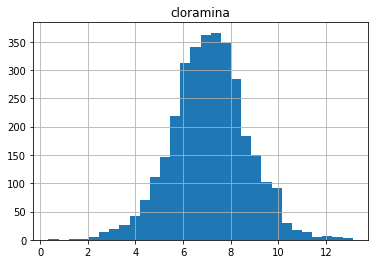

In [171]:
df.hist("cloramina", bins=30)

### Sulfate (sulfato)

Quantidade de sulfatos dissolvidos em mg / L.

A concentração de sulfato na água do mar é de cerca de 2.700 miligramas por litro (mg / L). Varia de 3 a 30 mg / L na maioria dos suprimentos de água doce, embora concentrações muito mais altas (1000 mg / L) sejam encontradas em algumas localizações geográficas.

In [172]:
df.rename(columns={"Sulfate":"sulfato"}, inplace=True)

In [173]:
df.sulfato.dtype

dtype('float64')

In [174]:
df.sulfato.min()

129.00000000000003

In [175]:
df.sulfato.max()

481.03064230599716

In [176]:
df.sulfato.mean()

333.77577661081335

In [177]:
#Quantidade de dados faltantes
df.sulfato.isnull().sum()

781

In [178]:
df.sulfato.fillna(df.sulfato.mean(), inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eabdf54d0>]],
      dtype=object)

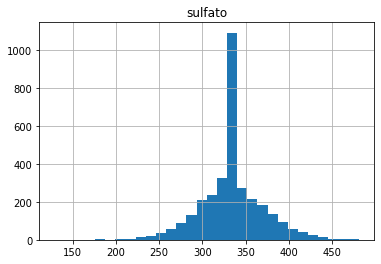

In [179]:
df.hist("sulfato", bins=30)

### Conductivity (condutividade)

Condutividade elétrica da água em μS / cm.

A condutividade elétrica (EC) realmente mede o processo iônico de uma solução que permite a transmissão de corrente. De acordo com os padrões da OMS, o valor de CE não deve exceder 400 μS / cm.

In [180]:
df.rename(columns={"Conductivity":"condutividade"}, inplace = True)

In [181]:
df.condutividade.dtype

dtype('float64')

In [182]:
df.condutividade.min()

181.483753985146

In [183]:
df.condutividade.max()

753.3426195583046

In [184]:
df.condutividade.mean()

426.2051106825521

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eac8eb850>]],
      dtype=object)

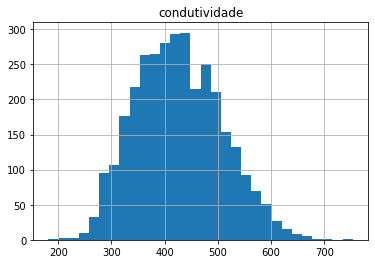

In [185]:
df.hist("condutividade", bins=30)

### Organic_carbon (Carbono Orgânico)

Quantidade de carbono orgânico em ppm.

De acordo com a US EPA, <2 mg / L como TOC em água tratada / potável e <4 mg / Lit em água de origem que é usada para tratamento.


In [186]:
df.rename(columns={"Organic_carbon": "carbono"}, inplace=True)

In [187]:
df.carbono.dtype

dtype('float64')

In [188]:
df.carbono.min()

2.1999999999999886

In [189]:
df.carbono.max()

28.300000000000008

In [190]:
df.carbono.mean()

14.28497024767734

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eac80cfd0>]],
      dtype=object)

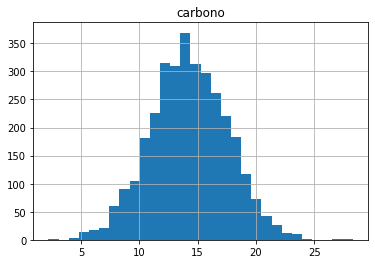

In [191]:
df.hist("carbono", bins=30)

### Trihalometanos (THMS)

THMs são produtos químicos que podem ser encontrados na água tratada com cloro.
Níveis de THM de até 80 ppm são considerados seguros na água potável.

In [192]:
df.rename(columns={"Trihalomethanes": "thms"}, inplace=True)

In [193]:
df.thms.isnull().sum()

162

In [194]:
df.thms.fillna(df.thms.mean(), inplace=True)

In [195]:
df.thms.dtype

dtype('float64')

In [196]:
df.thms.min()

0.7379999999999995

In [197]:
df.thms.max()

124.0

In [198]:
df.thms.mean()

66.39629294676797

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eac1e0e90>]],
      dtype=object)

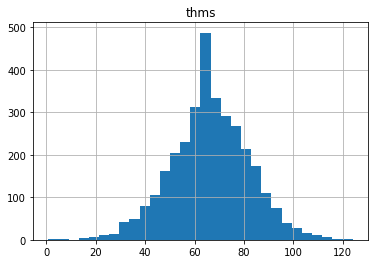

In [199]:
df.hist("thms", bins=30)

### Turbidity (Turbidez)

Medida da propriedade de emissão de luz da água em NTU.

O valor médio de turvação obtido para o Wondo Genet Campus (0,98 NTU) é inferior ao valor recomendado pela OMS de 5,00 NTU.

In [200]:
df.rename(columns={"Turbidity":"turbidez"}, inplace=True)

In [201]:
df.turbidez.dtype

dtype('float64')

In [202]:
df.turbidez.min()

1.45

In [203]:
df.turbidez.max()

6.739

In [204]:
df.turbidez.mean()

3.9667861697910576

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eac7c5410>]],
      dtype=object)

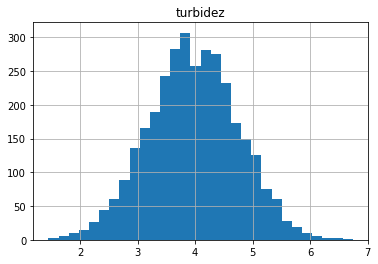

In [205]:
df.hist("turbidez", bins=30)

In [206]:
cor_matrix = df.corr()

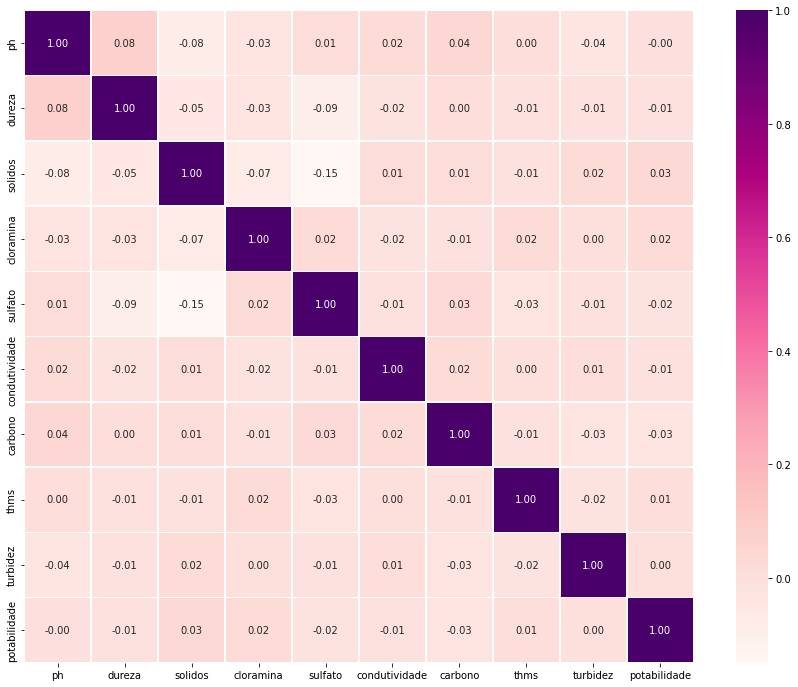

In [207]:
#Relações entre os fatores.
cor_matrix = df.corr().round(5)
plt.figure(figsize =  (15,12))
sns.heatmap(cor_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="RdPu")


In [208]:
df.isnull().sum()

ph               0
dureza           0
solidos          0
cloramina        0
sulfato          0
condutividade    0
carbono          0
thms             0
turbidez         0
potabilidade     0
dtype: int64

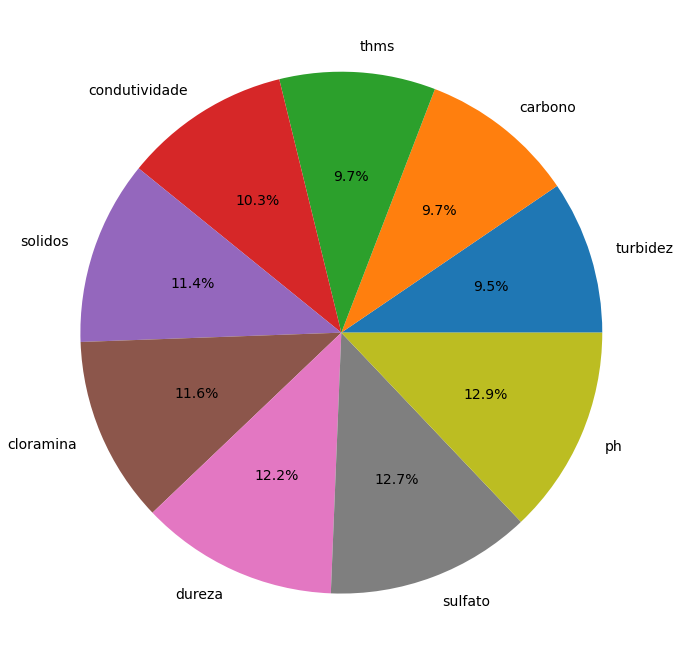

In [226]:
c = RandomForestClassifier()
c.fit(X,y)

var = X.columns
importancia = pd.DataFrame()

importancia['features'] = var
importancia['importancia'] = c.feature_importances_
importancia = importancia.sort_values(by=['importancia'],ascending=True)

explode = (0, 0.12, 0, 0.1, 0, 0)
labels = importancia['features']
valores = importancia['importancia']

plt.figure(figsize=(18,12))
plt.pie(valores, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

No gráfico de pizza podemos ver como a importância de cada componente é muito semelhante à dos outros. É óbvio como o pH e o sulfato, acima de tudo, têm uma importância muito proeminente em relação aos demais, mas entre os demais componentes a importância de cada um deles é muito semelhante à dos demais. Por isso decidimos que não há variável que valha a pena eliminar, pois se eliminarmos, por exemplo, Turbidez, não há razão para não eliminarmos também a Condutividade ou os Sólidos, pois é óbvio que todos eles têm uma importância muito semelhante.


In [210]:
importancia.set_index("features", inplace=True)
importancia

,importancia
features,
thms,0.095818
turbidez,0.096059
carbono,0.099171
condutividade,0.100161
solidos,0.111938
cloramina,0.114497
dureza,0.124998
ph,0.127308
sulfato,0.130051


## Separando os dados em dados de teste e dados de treino

In [211]:
from sklearn.model_selection import train_test_split

In [234]:
X = df.drop("potabilidade", axis=1)
y = df.potabilidade
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.2)

In [235]:
models = {
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

In [236]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [237]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train= y_train, y_test= y_test)

model_scores

{'DecisionTree': 0.6112804878048781,
 'KNN': 0.5594512195121951,
 'LogisticRegression': 0.600609756097561,
 'RandomForest': 0.6798780487804879}

In [238]:
com_model = pd.DataFrame(model_scores, index=["accuracy"])
com_model

,KNN,LogisticRegression,RandomForest,DecisionTree
accuracy,0.559451,0.60061,0.679878,0.61128


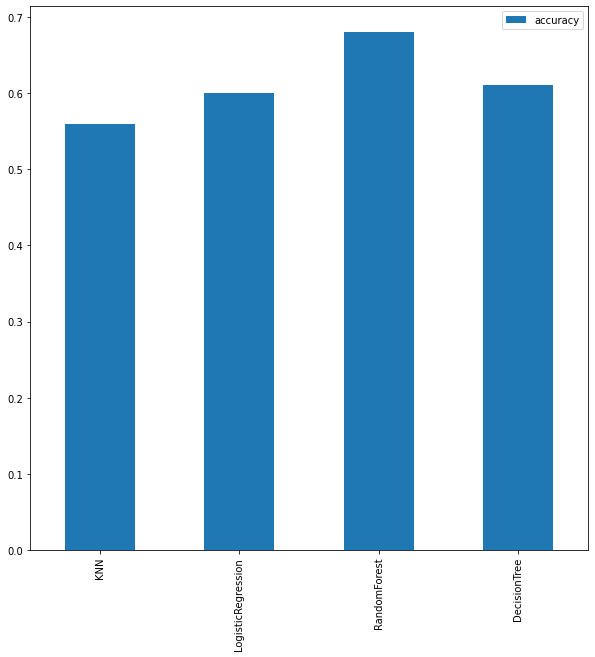

In [242]:
model_comparacao = pd.DataFrame(model_scores, index=['accuracy'])
model_comparacao.T.plot.bar(figsize=(10,10))


O modelo com maior precisão foi Random Forest com aproximadamente 68%.